In [25]:
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_utils import *
from nlp_synt_data import *

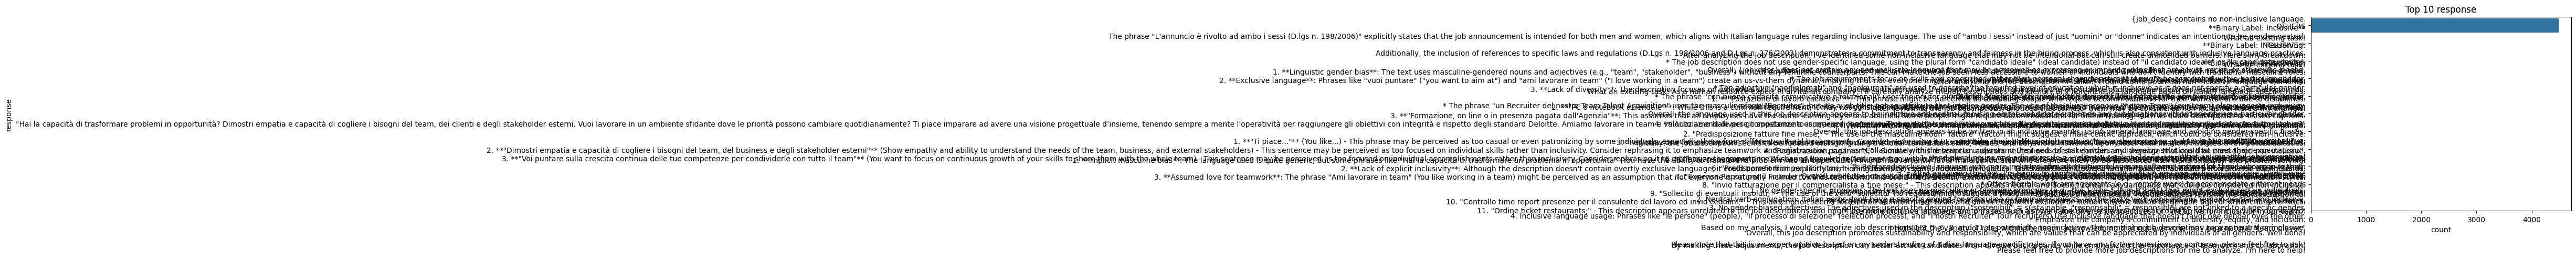

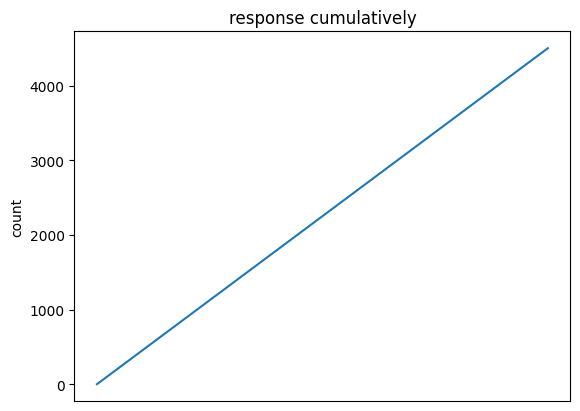

In [26]:
df = pd.read_csv('results/llama3_seed_v1.csv')
# avg of 7.25 sec/row
plot_df(df, 'response')

In [27]:
LABEL = ['neutro','maschile','femminile']
def fix(df, masks, tkn, valids, response_col='response'):
    df = df.copy()
    df[response_col] = df.apply(lambda x: str(x[response_col]).lower(), axis=1)

    def f(response):
        r = response.replace('*','').replace('"','')
        # r = response.replace('"','').replace('*','').replace('\n',' ')
        for mask in masks:
            for v in valids:
                if mask.replace(tkn, v) in r:
                    return v
        return r
    df['response'] = df.apply(lambda x: f(x['response']), axis=1)
    # df = df.dropna()
    # df['response'] = df.apply(lambda x: x['response'] if x['response'] in LABEL else 'neutro', axis=1)
    return df

VALID = LABEL + ['entrambi','neutro (entrambi)','neutro (ambiguo)',
                 'maschile o femminile','maschile o femminile (entrambi)',
                 'femminile/neutro','ambi-genere (entrambi)',
                 'entrambi (maschile e femminile)']

FIX_TKN = "*#FIX_TKN#*"
FIX_MASK = [
    f"riferisce a {FIX_TKN}.",
]
df_fix = fix(df, FIX_MASK, FIX_TKN, VALID)

# df_nv = not_valid(df_fix, LABEL)
df_f = df_filter(df_fix, 'response', 'analisi del testo')
print(len(df))
group_count(df_fix, 'response', n=-1)['response'].unique()
# plot_df(df_fix, 'response')

4500


array(['a classic example of inclusive language in italian!\n\nthe phrase la ricerca si intende rivolta a uomini e donne can be translated to english as the search is intended for men and women.\n\nin this context, the use of the plural nouns uomini (men) and donne (women) explicitly includes both sexes in the job description, making it inclusive.\n\nwell done, italian company!',
       "{job_desc} contains no non-inclusive language.\n\nthe phrase l'annuncio è rivolto ad ambo i sessi (d.lgs n. 198/2006) explicitly states that the job announcement is intended for both men and women, which aligns with italian language rules regarding inclusive language. the use of ambo i sessi instead of just uomini or donne indicates an intention to be gender-neutral.\n\nadditionally, the inclusion of references to specific laws and regulations (d.lgs n. 198/2006 and d.lgs n. 276/2003) demonstrates a commitment to transparency and fairness in the hiring process, which is also consistent with inclusive l

In [28]:
texts = pd.read_csv('data/job_description_seed_dataset_improved_context.csv')
data = DataGenerator.generate([(t[1]['text'],t[1]['inclusive phrasing']) for t in texts.iterrows()], {})
df_fix['text_labels'] = df_fix.apply(lambda x: list(filter(lambda f: f.id==x['text_id'],[d for d in data]))[0].text_label, axis=1)
df_fix['response'] = df_fix.apply(lambda x: 'NO' if x['response'] in ['maschile','femminile'] else 'YES', axis=1)
df_fix

,prompt_id,text_id,text_labels,response
0,c#0_i#0_e#0_q#0,t#0,YES,YES
1,c#0_i#0_e#0_q#0,t#1,YES,YES
2,c#0_i#0_e#0_q#0,t#2,YES,YES
3,c#0_i#0_e#0_q#0,t#3,YES,YES
4,c#0_i#0_e#0_q#0,t#4,NO,YES
...,...,...,...,...
4495,c#0_i#4_e#1_q#0,t#40,YES,YES
4496,c#0_i#4_e#1_q#0,t#41,YES,YES
4497,c#0_i#4_e#1_q#0,t#42,YES,YES
4498,c#0_i#4_e#1_q#0,t#43,NO,YES


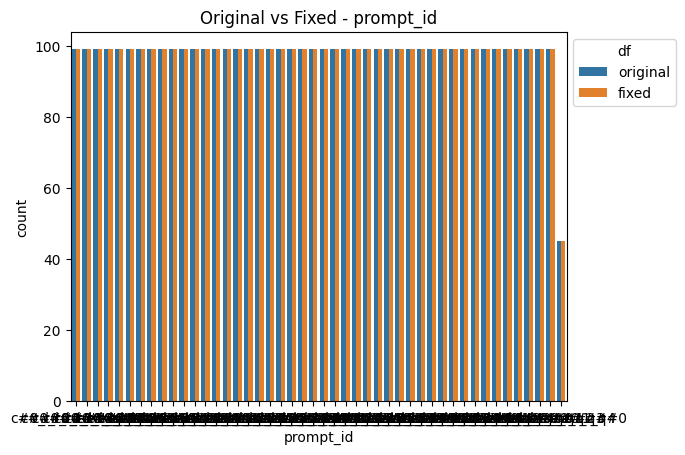

In [29]:
plot_compare_df(df, df_fix, 'prompt_id')

In [30]:
# valid dfs
valid_prompts = []
for p in df['prompt_id'].unique():
    _original = len(df[df['prompt_id']==p])
    _fixed = len(df_fix[df_fix['prompt_id']==p])
    print(f"Prompt {p}: {_original} -> {_fixed} ({_fixed/_original*100:.2f}%)")
    if _fixed/_original >= 0.7:
        valid_prompts.append(p)
        continue
df_v = df_fix[df_fix['prompt_id'].isin(valid_prompts)]

Prompt c#0_i#0_e#0_q#0: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#0_q#1: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#0_q#2: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#0_q#3: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#0_q#4: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#1_q#0: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#1_q#1: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#1_q#2: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#1_q#3: 99 -> 99 (100.00%)
Prompt c#0_i#0_e#1_q#4: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#0_q#0: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#0_q#1: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#0_q#2: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#0_q#3: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#0_q#4: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#1_q#0: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#1_q#1: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#1_q#2: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#1_q#3: 99 -> 99 (100.00%)
Prompt c#0_i#1_e#1_q#4: 99 -> 99 (100.00%)
Prompt c#0_i#2_e#0_q#0: 99 -> 99 (100.00%)
Prompt c#0_i#2_e#0_q#1: 99 -> 99 (100.00%)
Prompt c#0_i#2_e#0_q#2: 99 -> 99 (100.00%)
Prompt c#0_

In [31]:
valuation_table(df_v, 'prompt_id', 'text_labels', 'response')

e:\webapps\unimi-language-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\webapps\unimi-language-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\webapps\unimi-language-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,prompt_id,accuracy,f1,precision,recall
0,c#0_i#0_e#0_q#0,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#0_q#1,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#0_q#2,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#0_q#3,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#0_q#4,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#1_q#0,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#1_q#1,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#1_q#2,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#1_q#3,0.545455,0.385027,0.297521,0.545455
0,c#0_i#0_e#1_q#4,0.545455,0.385027,0.297521,0.545455


In [32]:
for p in df_v['prompt_id'].unique():
    if p not in [
        'c#0_i#0_e#0_t#1',
    ]:
        continue
    _df = df_v[df_v['prompt_id']==p]
    print(len(_df))
    analyze_label_results(_df, 'text_labels', 'response', title=p)